In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.misc import derivative
from functools import partial

# Homework CNS Week 1

## Stefan Iacob (s4575121), Bas Krahmer (s4616553), Davide Sabeddu (s1032453)

## Assignment 1
### a) 
Solve by hand using Newton’s method the equation f(x) = x^(2)−2=0.

<img src="0000.jpg">

### b)
We first implement the function $f(x) = x \cdot exp(-x) + 1$. We check wether the function has a root by plotting it.

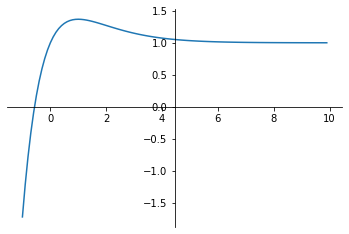

In [4]:
def func(x):
    return x * np.exp(-x) + 1

# Checking wether func has a root
x = np.arange(-1,10,0.1)
fx = func(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, fx)

We see that the function has a root. We implement Newton's method and test it

In [60]:
def recursive_newtons_method(func, x_current, nr_it, current_it=0):
    if(current_it < nr_it):
        x_next = x_current - (func(x_current)/derivative(func, x_current))
        return recursive_newtons_method(func, x_next, nr_it, current_it + 1)
    return x_current

root = recursive_newtons_method(func, 0, 6)
print(root)

-0.5673465224145116


Filling in this value in the original function, we should get a value close to zero.

In [61]:
func(root)

-0.0005616688033880379

### c)
For the parametrized function $f(x)=x \cdot exp(-x) + a$, we want to find out for which values of $a$ the function has roots. By looking at the plot in b) where $a = 1$, we can see that the function stops having roots if it is entirely below the x-axis. This happens when $ a < f(x^*)$, where $f(x^*)$ is the function maximum. To find this function maximum, we compute $f'(x) = 0$.  
$f'(x) = -x \cdot exp(-x) + exp(-x) = exp(-x)(1 - x) = 0$   
So, for $x = 1$, we find the function maximum $f(1) = exp(-1) + a$, so for $a = -exp(-1)$, there is still one root. For $a < -exp(-1)$, there are no roots. Thus, $a = [-e^{-1}, \infty)$.   
Note that $f'(x)$ also tends to 0 for $\lim_{x\to\infty} $. To find out the asymptote of $f(x)$, we compute $\lim_{x\to\infty} \frac{x}{e^{x}} = \lim_{x\to\infty} \frac{[x]'}{[e^{x}]'} = \lim_{x\to\infty} \frac{1}{e^{x}} = 0$. Thus, for $a > 0$ there is again only 1 root.   
For the plot, we refer to exercise 1. d)

### d)
Instead of matlab function fzero, we use scipy function fsolve. We first define the parametrized function $f(x)=x \cdot exp(-x) + a$, then we partially apply a range of $a$, and then we solve those functions.

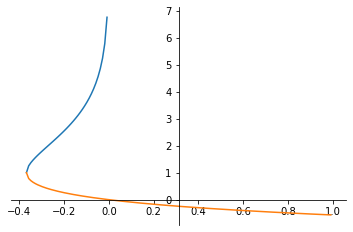

In [141]:
from scipy.optimize import fsolve

def param_func(x, a):
    return x * np.exp(-x) + a

params = np.arange(-np.exp(-1), 1, 0.01) # Range of parameters
roots1 = []
roots2 = []
i = 0
for a in params:
    # initial estimates. Either 2 or 1, depending on value of a
    if a < 0:
        x_0 = -np.log(-a)# initial estimates
        i += 1
    else:
        x_0 = 0
    #print(x_0)
    #func = partial(param_func, a)# partially applying parameter
    root1 = fsolve(param_func, x_0, a)
    root2 = fsolve(param_func, 0, a)
    roots1.append(root1)
    roots2.append(root2)
    

roots = np.zeros((2,len(params)))
roots[0,:] = roots1
roots[1,:] = roots2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(params[:i], roots[0,:i])
plt.plot(params, roots[1,:])

In the plot above, we see $a$ on the x-axis and the roots of $f(x)$ on the y-axis.

## Assignment 2

### a)
Using Euler's method and $h = 0.5$:  
$x_0 = 0$ and $y(x_0) = -1$  
$x_1 = 0.5$ and $y_1 = y_0 + h\cdot f(x_0, y_0) = -1 + 0.5 \cdot 1 = -0.5 $  
$x_2 = 1$ and $y_2 = y_1 + h\cdot f(x_1, y_1) = -0.5 + 0.5 \cdot -0.5 = -0.75 $  
$y_3 = y_2 + h\cdot f(x_2, y_2) = -0.75 + 0.5 \cdot -1.25 = -1.375$  
  
Using Euler's method and $h = 0.25$:  
$x_0 = 0$ and $y(x_0) = -1$ 
$x_1 = 0.25$ and $y_1 = y_0 + h\cdot f(x_0, y_0) = -1 + 0.25 \cdot 1 = -0.75 $   
$x_2 = 0.5$ and $y_2 = y_1 + h\cdot f(x_1, y_1) = -0.75 + 0.25 \cdot 0.25 = -0.6875 $  
$x_3 = 0.75$ and $y_3 = y_2 + h\cdot f(x_2, y_2) = -0.6875 + 0.25 \cdot -0.3125 = -0.078125$  
$x_4 = 1$ and $y_4 = y_3 + h\cdot f(x_3, y_3) = -0.078125 + 0.25 \cdot -1.421875 = -0.43359375$  
$y_5 = y_4 + h\cdot f(x_4, y_4) = -0.43359375 + 0.25 \cdot -1.56640625 = -0.8251953125$  
  
Using second order RK amd $h = 0.5$:  
$x_0 = 0$ and $y(x_0) = -1$  
$x_1 = 0.5$  
$\tilde{y}_1 = y_0 + h\cdot f(x_0, y_0) = -1 + 0.5 \cdot 1 = -0.5 $  
$y_1 = y_0 + \frac{1}{2}h(f(x_0, y_0) + f(x_1,\tilde{y}_1)) = -1 + 0.5 \cdot 0.5 \cdot (1 -0.5) = -0.875$   
$x_2 = 1$  
$\tilde{y}_2 = y_1 + h\cdot f(x_1, y_1) = -0.875 + 0.5 \cdot -0.125 = -0.9375 $   
$y_2 = y_1 + \frac{1}{2}h(f(x_1, y_1) + f(x_2,\tilde{y}_2)) = -0.875 + 0.25 \cdot (-0.125 - 1.0625) = -1.171875$  
$\tilde{y}_3 = y_2 + h\cdot f(x_2, y_2) = -1.171875 + 0.5 \cdot -0.828125 = -1.5859375 $  
$x_3 = 1.5$  
$y_3 = y_2 + \frac{1}{2}h(f(x_2, y_2) + f(x_3,\tilde{y}_3)) = -1.171875 + 0.25 \cdot (-0.828125 -1.4140625) = -1.732421875$  
  
Real solutions using $y(x) = -3e^{-x}-2x+2$:  
$y_0 = y(0) = -1$  
$y_1 = y(0.5) = -0.8195919791379005$  
$y_2 = y(1.0) = -1.103638323514327$  
  
We see that the Runge-Kutta method with $h = 0.5$ is already much closer to the analytical solution than both Euler's method solutions.  
  
### b)
Instead of matlab's ode45, we will be using scipy.integrate.ode. First, we implement the ODE below.

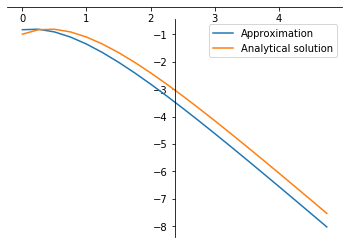

In [7]:
from scipy.integrate import ode

def odefun_ex2(x, y):
    return -2*x -y

# Now we use ode to solve
dt = 0.25
r = ode(odefun_ex2)
r.set_initial_value(-1, 0)
y = []
x = []
while r.successful() and r.t < 5:
    x.append(r.t)
    y.append(r.integrate(r.t+dt))

# Analytical solution for comparison
def analytical_y(x):
    return -3*np.exp(-x)-2*x+2

y_true = analytical_y(np.array(x))

# Now we plot both for comparison
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
approx, = ax.plot(x,y)
real, = ax.plot(x,y_true)
approx.set_label('Approximation')
real.set_label('Analytical solution')
ax.legend()

We see that the solution approximated with scipy's ode function is still slightly off compared to the analytical solution.

### c)
If    
$\theta = y_1$  
$\frac{d\theta}{dt} = y_2$
  
Then,  
$y_2' = \frac{d^2\theta}{dt^2} = I -sin(\theta)$  
$y_1' = \frac{d\theta}{dt} = y_2$

### d)


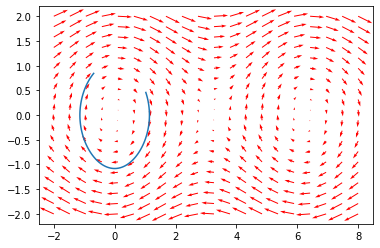

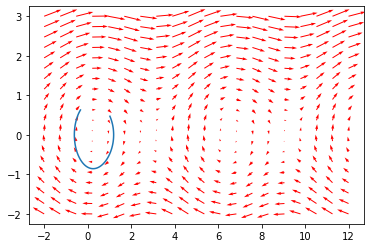

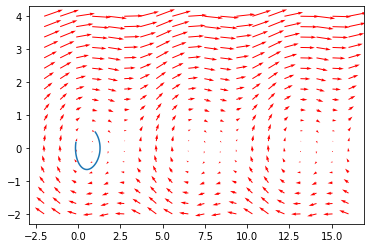

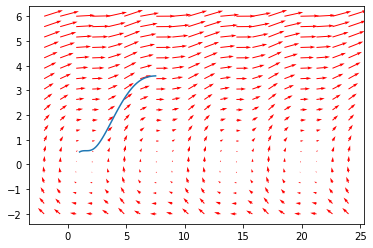

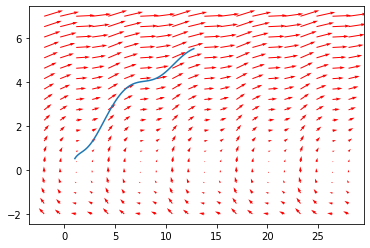

In [42]:
def dy_dt(t, y, I):
    dy = np.array([y[1], I - np.sin(y[0])])
    return dy

def mod_euler(func, t_current, y_current, h, I):
    y_approx = y_current + h * func(t_current, y_current, I)
    y_next = y_current + 0.5 * h * (func(t_current, y_current, I) + func(t_current, y_approx, I))
    t_next = t_current + h
    return t_next, y_next

for I in [0, 0.25, 0.5, 1, 1.25]:
    # code below inspired from http://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/
    ##########################################################################
    y1 = np.linspace(-2.0, I * 16.0 + 8, 20)
    y2 = np.linspace(-2.0, I * 4.0 + 2, 20)
    Y1, Y2 = np.meshgrid(y1, y2)
    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
    NI, NJ = Y1.shape
    t = 0
    for i in range(NI):
        for j in range(NJ):
            x = Y1[i, j]
            y = Y2[i, j]
            yprime = dy_dt(t, [x, y], I)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]
    Q = plt.figure()
    Q = plt.quiver(Y1, Y2, u, v, color='r')
    ##########################################################################


    y_start = np.array([1,0.5])

    length = 100
    y = y_start
    Y = np.zeros((2,length))
    for i in range(length):
        t, y = mod_euler(dy_dt, t, y, 0.05, I)
        Y[:,i] = y

    Q = plt.plot(Y[0,:], Y[1,:])

### e)

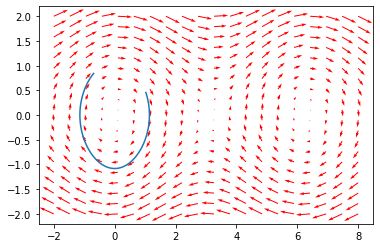

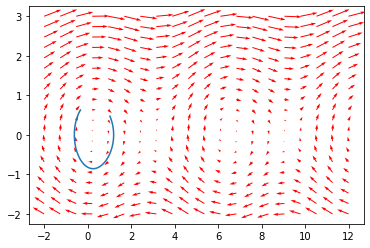

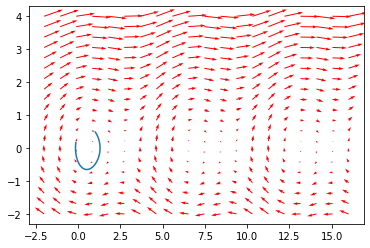

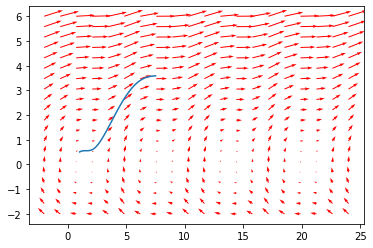

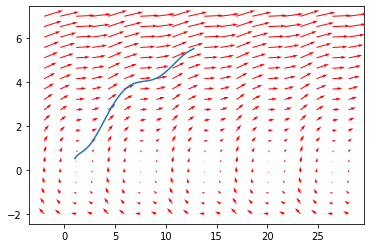

In [46]:
for I in [0, 0.25, 0.5, 1, 1.25]:
    # code below inspired from http://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/
    ##########################################################################
    y1 = np.linspace(-2.0, I * 16.0 + 8, 20)
    y2 = np.linspace(-2.0, I * 4.0 + 2, 20)
    Y1, Y2 = np.meshgrid(y1, y2)
    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
    NI, NJ = Y1.shape
    t = 0
    for i in range(NI):
        for j in range(NJ):
            x = Y1[i, j]
            y = Y2[i, j]
            yprime = dy_dt(t, [x, y], I)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]
    Q = plt.figure()
    Q = plt.quiver(Y1, Y2, u, v, color='r')
    ##########################################################################


    y_start = np.array([1,0.5])

    length = 100
    Y = np.zeros((2,length))
    r = ode(dy_dt)
    r.set_f_params(I) # with this line we can incorporate parameter I
    r.set_initial_value(y_start, [0,0])
    for i in range(length):
        Y[:,i] = r.integrate(r.t + np.array([0.05, 0.05]))

    Q = plt.plot(Y[0,:], Y[1,:])

## Assignment 3. Consider the second-order differential equation y''+by'+y = 0 for different values of b.
a. Determine the analytical solution of this equation and characterize the nature of these solutions (remember the course ‘Trillingen & golven’?).

<img src="0001.jpg">


b. Write this system as two coupled first order equations and determine the stability of the fixed point at the origin. What is the nature of the solutions found in a. for different b values when they are plotted in the phase plane?

<img src="0002.jpg">
<img src="0003.jpg">

c. Find the stability of the equilibrium point at the origin for the nonlinear equation y''+b(y')^3 + y = 0 (You can do this qualitatively by considering a few trajectories) 

4th
<img src="0004.jpg">

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [13]:
# System of first order differential equations

def u_prime(x, y):
    return y

def v_prime(x, y, b):
    return - b * y**3 - x

In [20]:
b_global = 0

def f(Y, b):
    y1, y2 = Y
    return (y2, -b_global *(y2)**3 - y1)

def createPlot(b_value, IC):

    y1 = np.linspace(-2, 2, 20)
    y2 = np.linspace(-2, 2, 20)


    Y1, Y2 = np.meshgrid(y1, y2)

    t = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    for i in range(NI):
        for j in range(NJ):
            x = Y1[i, j]
            y = Y2[i, j]

            yprime = f([x, y], b_value)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

# plot trajectories from an initial condition y0
    
    for y10, y20 in IC:
        tspan = np.linspace(0, 50, 200)
        y0 = [y10, y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-') # path
        plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
        plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
        

    Q = plt.quiver(Y1, Y2, u, v, color='r')

    plt.xlabel('$u$')
    plt.ylabel('$v$')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.title('Behavior for b=' + str(b_value))
    plt.show()

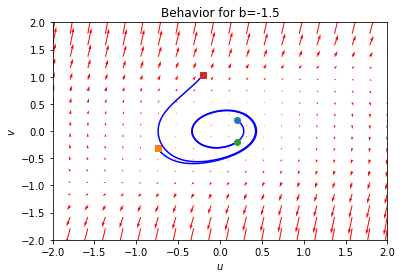

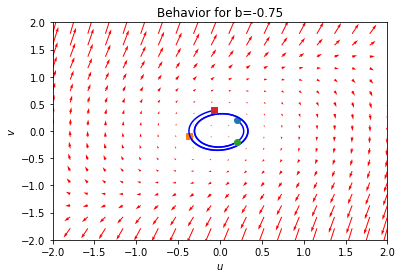

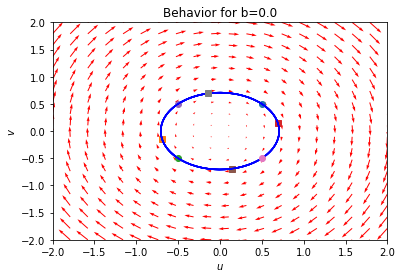

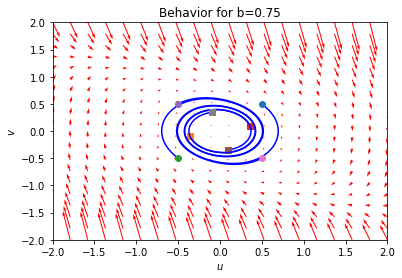

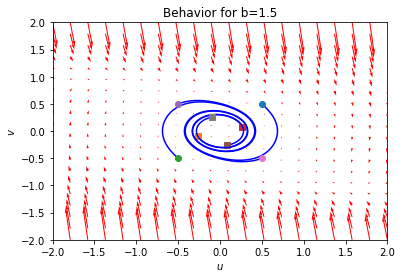

In [30]:
#Plot the phase space for different b values

IC = [(0.5, 0.5), (-0.5, -0.5), (-0.5, 0.5), (0.5, -0.5)] #Initial conditions
IC_small_b = [(0.2, 0.2), (0.2, -0.2)] #Initial conditions


for b_val in np.linspace(-1.5, 1.5, 5): 
    b_global = b_val
    if b_val<0:
        createPlot(b_val, IC_small_b)
    else:
        createPlot(b_val, IC)

From the study of the phase plane's trajectories with initial conditions, we have found that the fixed point is a stable spiral for different b values, except the case b = 0.